# Quiz Métodos computacionales
## Gariel Cataño Sánchez
### CC: 1039474879

## Enunciado



Paracaidista en un atmosfera no uniforme.
En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

$$
P=P_0 e^{-\frac{Mgy}{kT}}
$$

- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $N_A=6.0225\times 10^{23}$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$

Las fuerzas que actuan sobre el paracaidista son: El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta}{2m} \rho v^2 
$$$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{k_0v^2 exp(-y/\lambda)}{m}
$$
donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.Elaborar una gráfica de la densidad como función de la altura.

2.Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:
- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

Con la solucion de la ecuacion diferencial, elaborar una gráfica de.
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición

Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:
http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html

Realice un grafico de la velocidad maxima como función de la altura de caida.

Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
$$
donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$

Solucione la ecuación diferencial para este caso.

In [174]:
# Librerías
import numpy as np
import matplotlib.pylab as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy import optimize
from scipy import interpolate
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [175]:
# Prámetros iniciales
P0 = 1 #atm
M = 0.0288  #Kg/mol
g = 9.80 #m/s^2
k = 1.3805e23   #J/K
T = 254 #K
rho0 = 1.29 #kg/m^3
la = 7482.2  #m

In [176]:
# Presíón atmosférica dependiente de la altura
def P(M,g,k,T,y):
  return P0*np.exp((-M*g*y)/k*T)

# Densidad volumétrica del gas
def rho(rho0,la,y):
  return rho0*np.exp(-y/la)


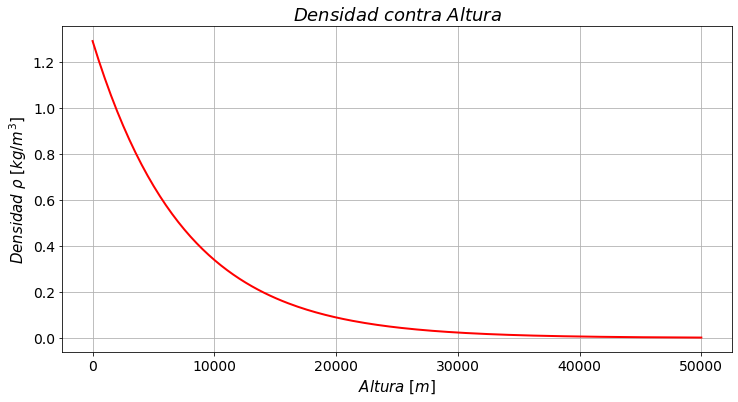

In [177]:
# Gráfica de la densidad volumétrica de un gas en función de la altura

plt.figure(figsize=(12,6))
y = np.linspace(0,50000,200)
plt.plot(y,rho(rho0,la,y),'r',lw=2)
plt.title('$Densidad$ $contra$ $Altura$', size = 18)
plt.xlabel('$Altura$ $[m]$', size = 15)
plt.ylabel('$Densidad$ $\\rho$ $[kg/m^3]$',size=15)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.grid()

In [178]:
# Función de la ecuación diferencial
def func(y, t):

  m = 60        #kg
  A = 0.3       #kg/m^3
  # Coeficiente de fricción
  delt = 0.6
  k0 = rho0*A*delt/2

  # dydt = v 
  dydt = y[1]    
  
  # dvdt = dy2/dt2 = a, ecuación diferencial.
  dvdt = (k0 * (y[1])**2 * np.exp(-y[0]/la)/m ) - g


  return [dydt, dvdt] 


# Tiempo de integracion
t = np.linspace(0, 200, 1000)

In [179]:
# Alturas de caída
h1 = 30e3
h2 = 40e3
h3 = 50e3
h4 = 60e3
h5 = 70e3

# Condiciones iniciales, [y(0), y'(0)], para cada altura.
y01 = [h1,0]
y02 = [h2,0]
y03 = [h3,0]
y04 = [h4,0]
y05 = [h5,0]

# Solución de la ecuaión deiferencial, integración ODE. Para cada altura.
y1 = integrate.odeint(func, y01, t)
y2 = integrate.odeint(func, y02, t)
y3 = integrate.odeint(func, y03, t)
y4 = integrate.odeint(func, y04, t)
y5 = integrate.odeint(func, y05, t)


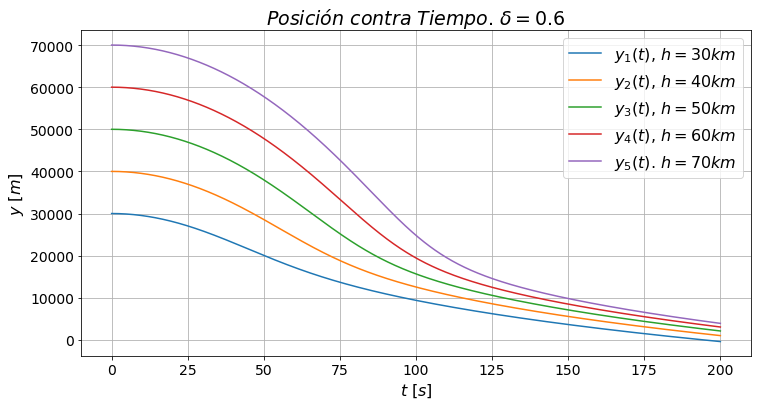

In [180]:
# Gráfica de las soluciones a la ecuación diferencial para cada altura.
# Posición ocntra tiempo

plt.figure(figsize=(12,6))

plt.plot(t,y1[:,0], label = '$y_1(t)$, $h = 30km$')
plt.plot(t,y2[:,0], label = '$y_2(t)$, $h = 40km$')
plt.plot(t,y3[:,0], label = '$y_3(t)$, $h = 50km$')
plt.plot(t,y4[:,0], label = '$y_4(t)$, $h = 60km$')
plt.plot(t,y5[:,0], label = '$y_5(t)$. $h = 70km$')
plt.title('$Posición$ $contra$ $Tiempo$. $\\delta = 0.6$', size = 19)
plt.xlabel("$t$ $[s]$", size = 16)
plt.ylabel("$y$ $[m]$", size = 16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(fontsize = 16, loc = 'best')
plt.grid()

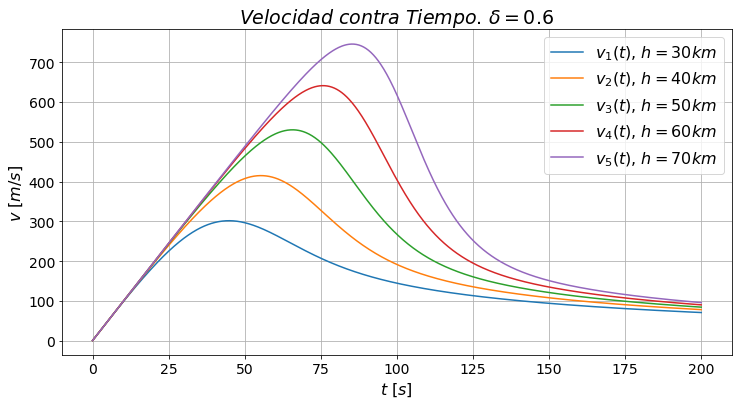

In [181]:
# Gráfica de la velocidad contra el tiempo

plt.figure(figsize=(12,6))

plt.plot(t,-y1[:,1], label = '$v_1(t)$, $h = 30km$')
plt.plot(t,-y2[:,1], label = '$v_2(t)$, $h = 40km$')
plt.plot(t,-y3[:,1], label = '$v_3(t)$, $h = 50km$')
plt.plot(t,-y4[:,1], label = '$v_4(t)$, $h = 60km$')
plt.plot(t,-y5[:,1], label = '$v_5(t)$, $h = 70km$')

plt.title('$Velocidad$ $contra$ $Tiempo$. $\\delta = 0.6$', size = 19)
plt.xlabel("$t$ $[s]$", size = 16)
plt.ylabel("$v$ $[m/s]$", size = 16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(fontsize = 16, loc = 'best')
plt.grid()

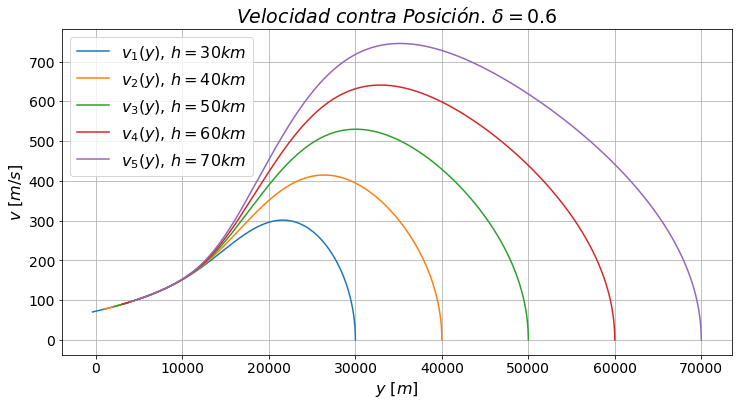

In [182]:
# Gráfica de la velocidad contra la posición

plt.figure(figsize=(12,6))

plt.plot(y1[:,0],-y1[:,1], label = '$v_1(y)$, $h = 30km$')
plt.plot(y2[:,0],-y2[:,1], label = '$v_2(y)$, $h = 40km$')
plt.plot(y3[:,0],-y3[:,1], label = '$v_3(y)$, $h = 50km$')
plt.plot(y4[:,0],-y4[:,1], label = '$v_4(y)$, $h = 60km$')
plt.plot(y5[:,0],-y5[:,1], label = '$v_5(y)$, $h = 70km$')

plt.title('$Velocidad$ $contra$ $Posición$. $\\delta = 0.6$', size = 19)
plt.xlabel("$y$ $[m]$", size = 16)
plt.ylabel("$v$ $[m/s]$", size = 16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(fontsize = 16, loc = 'best')
plt.grid()

In [183]:
# Interpolación para hallar el mpaximo de la velocidad en cada caso

y1t = interpolate.CubicSpline(t,y1[:,0])
y1pt = y1t.derivative()
y2t = interpolate.CubicSpline(t,y2[:,0])
y2pt = y2t.derivative()
y3t = interpolate.CubicSpline(t,y3[:,0])
y3pt = y3t.derivative()
y4t = interpolate.CubicSpline(t,y4[:,0])
y4pt = y4t.derivative()
y5t = interpolate.CubicSpline(t,y5[:,0])
y5pt = y5t.derivative()

# Velocidad máxima para cada altura

m1 = optimize.fmin_powell(y1pt,0)
m2 = optimize.fmin_powell(y2pt,0)
m3 = optimize.fmin_powell(y3pt,0)
m4 = optimize.fmin_powell(y4pt,0)
m5 = optimize.fmin_powell(y5pt,0)

Optimization terminated successfully.
         Current function value: -301.432880
         Iterations: 2
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -414.860090
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -530.054612
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -641.114802
         Iterations: 2
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -745.742526
         Iterations: 2
         Function evaluations: 38


In [184]:
# Muestra la velocidad máxima para cada altura

print(f'Velocidad máxima h = 30 km: {round(abs(y1pt(m1)),2)} m/s')
print(f'Velocidad máxima h = 40 km: {round(abs(y2pt(m2)),2)} m/s')
print(f'Velocidad máxima h = 50 km: {round(abs(y3pt(m3)),2)} m/s')
print(f'Velocidad máxima h = 60 km: {round(abs(y4pt(m4)),2)} m/s')
print(f'Velocidad máxima h = 70 km: {round(abs(y5pt(m5)),2)} m/s')

Velocidad máxima h = 30 km: 301.43 m/s
Velocidad máxima h = 40 km: 414.86 m/s
Velocidad máxima h = 50 km: 530.05 m/s
Velocidad máxima h = 60 km: 641.11 m/s
Velocidad máxima h = 70 km: 745.74 m/s


In [185]:
# Condiciones iniciales de altura.
x = np.array([h1,h2,h3,h4,h5])

# Valores de velocidad máxima para los datos de las condiciones iniciales
v = np.array([round(abs(y1pt(m1)),2),round(abs(y2pt(m1)),2),\
              round(abs(y3pt(m1)),2),round(abs(y4pt(m1)),2),round(abs(y5pt(m1)),2)])

# Diccionario ppara hacer un dataframe
dicc = {'Altura [m]': x, 'Velocidad máxima [m/s]': v}
d = pd.DataFrame(dicc)
d

,Altura [m],Velocidad máxima [m/s]
0,30000.0,301.43
1,40000.0,387.24
2,50000.0,423.80
3,60000.0,435.09
4,70000.0,438.19


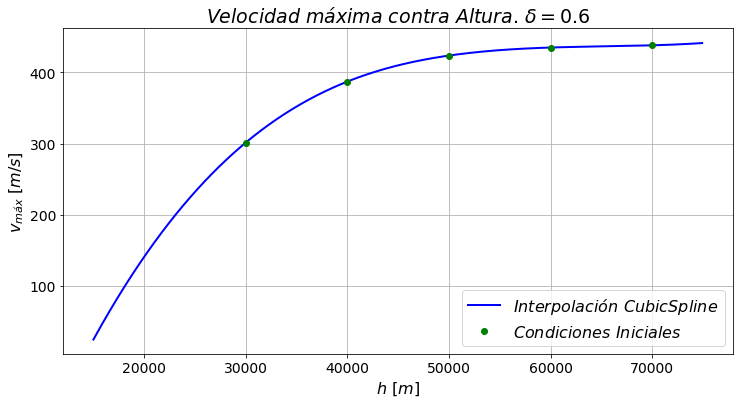

In [186]:
# Condiciones iniciales de altura.
x = np.array([h1,h2,h3,h4,h5])

# Valores de velocidad máxima para los datos de las condiciones iniciales
v = np.array([round(abs(y1pt(m1)),2),round(abs(y2pt(m1)),2),\
              round(abs(y3pt(m1)),2),round(abs(y4pt(m1)),2),round(abs(y5pt(m1)),2)])

# Interpolación de los datos de velocidad máxima y altura
vm = interpolate.CubicSpline(x,v)

# Intervalo para graficar
x_ = np.arange(15000,75000,100)

# Gráfica de la velocidad máxima en función de la altura.

plt.figure(figsize=(12,6))
plt.plot(x_,vm(x_), 'b', lw=2, label = '$Interpolación$ $CubicSpline$')
plt.plot(x,v, 'go', lw=2, label='$Condiciones$ $Iniciales$')
plt.title('$Velocidad$ $máxima$ $contra$ $Altura$. $\\delta = 0.6$', size = 19)
plt.xlabel("$h$ $[m]$", size = 16)
plt.ylabel("$v_{máx}$ $[m/s]$", size = 16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(fontsize = 16, loc = 'best')
plt.grid()